In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end= '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556000
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [3]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556000
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [4]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


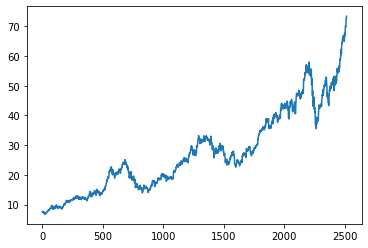

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
ma100
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

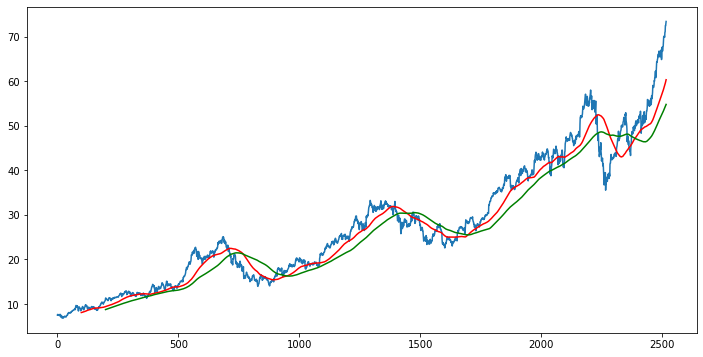

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [8]:
df.shape

(2517, 5)

In [9]:
# Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [10]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [11]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [15]:
data_training_array.shape

(1761, 1)

In [16]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [17]:
x_train = np.array(x_train)  

In [18]:
y_train = np.array(y_train)  

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2022-02-12 09:51:06.563765: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-12 09:51:06.563860: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2022-02-12 09:51:45.177574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-12 09:51:45.177658: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-12 09:51:45.177736: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (BlackCat): /proc/driver/nvidia/version does not exist


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 38s 517ms/step - loss: 0.0558
Epoch 2/50
52/52 [==============================] - 27s 512ms/step - loss: 0.0123
Epoch 3/50
52/52 [==============================] - 27s 515ms/step - loss: 0.0095
Epoch 4/50
52/52 [==============================] - 27s 514ms/step - loss: 0.0096
Epoch 5/50
52/52 [==============================] - 27s 516ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 27s 515ms/step - loss: 0.0078
Epoch 7/50
52/52 [==============================] - 27s 516ms/step - loss: 0.0076
Epoch 8/50
52/52 [==============================] - 27s 512ms/step - loss: 0.0072
Epoch 9/50
52/52 [==============================] - 27s 513ms/step - loss: 0.0065
Epoch 10/50
52/52 [==============================] - 27s 518ms/step - loss: 0.0065
Epoch 11/50
52/52 [==============================] - 27s 517ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 26s 496ms/step - loss: 0.0058
Epoch 13/50
5

In [23]:
model.save('keras_model.h5')

In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [26]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [27]:
input_data=scaler.fit_transform(final_df)

In [28]:
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [29]:
input_data.shape

(856, 1)

In [30]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [31]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [33]:
# Making Predictions

y_predicted = model.predict(x_test)

In [34]:
y_predicted.shape

(756, 1)

In [35]:
y_predicted

array([[0.15189324],
       [0.15254617],
       [0.15319951],
       [0.15383826],
       [0.1544502 ],
       [0.15502533],
       [0.1555596 ],
       [0.15605265],
       [0.1565114 ],
       [0.15694615],
       [0.15736699],
       [0.15777807],
       [0.15818276],
       [0.15858617],
       [0.15899001],
       [0.1593934 ],
       [0.15979502],
       [0.16019207],
       [0.16058695],
       [0.1609892 ],
       [0.16140544],
       [0.16183758],
       [0.16228138],
       [0.16276562],
       [0.16335629],
       [0.16410652],
       [0.1650579 ],
       [0.16623548],
       [0.16766022],
       [0.16934073],
       [0.1712685 ],
       [0.1734232 ],
       [0.17578784],
       [0.17834623],
       [0.18107286],
       [0.18392763],
       [0.18687358],
       [0.18987708],
       [0.1928984 ],
       [0.19589415],
       [0.19882405],
       [0.20165329],
       [0.20437677],
       [0.20699331],
       [0.20951   ],
       [0.21193239],
       [0.21426289],
       [0.216

In [36]:
scaler.scale_

array([0.02099517])

In [37]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

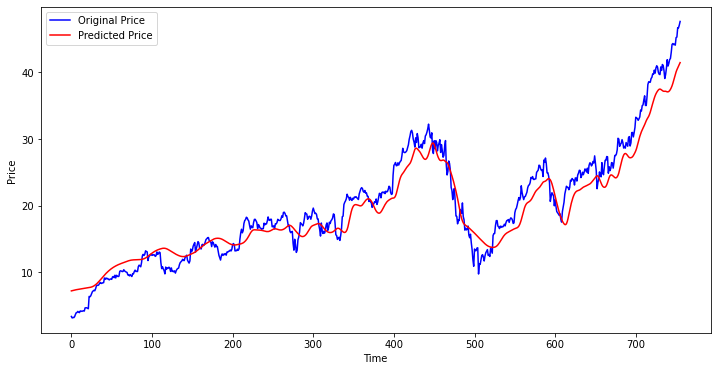

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()